In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load data into a DataFrame
data = pd.read_csv('FilteredData_MorrisLecar_I0_80.csv')

# Calculate correlation coefficients among all variables
correlation_matrix = data.corr()

# Print the correlation table
print(correlation_matrix)




               Amp         L        L1        p1        L2        p2  \
Amp       1.000000 -0.052484 -0.856121  0.984346 -0.152253  0.259221   
L        -0.052484  1.000000  0.043000 -0.039234 -0.532490  0.688703   
L1       -0.856121  0.043000  1.000000 -0.927663  0.138950 -0.259039   
p1        0.984346 -0.039234 -0.927663  1.000000 -0.152374  0.267671   
L2       -0.152253 -0.532490  0.138950 -0.152374  1.000000 -0.620285   
p2        0.259221  0.688703 -0.259039  0.267671 -0.620285  1.000000   
tnextmax  0.041226  0.879822 -0.043699  0.044525 -0.683772  0.898289   
l3max     0.074896  0.878178 -0.095113  0.085430 -0.686622  0.904704   
p3max     0.990365 -0.074186 -0.905331  0.994475 -0.139075  0.279068   

          tnextmax     l3max     p3max  
Amp       0.041226  0.074896  0.990365  
L         0.879822  0.878178 -0.074186  
L1       -0.043699 -0.095113 -0.905331  
p1        0.044525  0.085430  0.994475  
L2       -0.683772 -0.686622 -0.139075  
p2        0.898289  0.904704  0.2

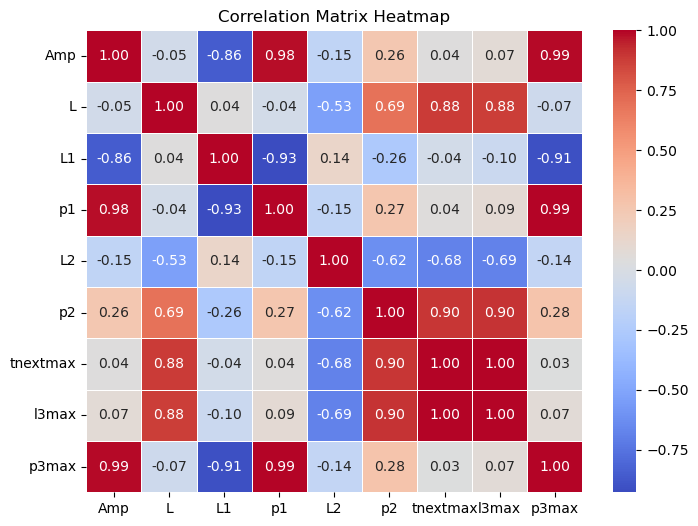

In [3]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [5]:
# The equation to calculate the corelation coefficient:
#  r = Σ((Xi - X̄)(Yi - Ȳ)) / √(Σ(Xi - X̄)^2 * Σ(Yi - Ȳ)^2)


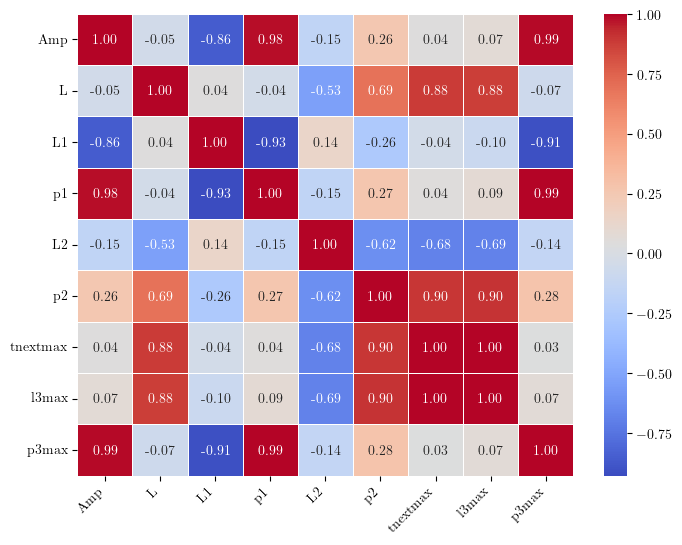

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Convert each column name into a LaTeX formatted string.
# This wraps each label in math mode and escapes underscores.
latex_labels = [r"$\mathrm{" + label.replace("_", r"\_") + "}$" for label in correlation_matrix.columns]

# Apply the LaTeX formatted labels to the x and y ticks
ax.set_xticklabels(latex_labels, rotation=45, ha='right')
ax.set_yticklabels(latex_labels, rotation=0)

plt.show()

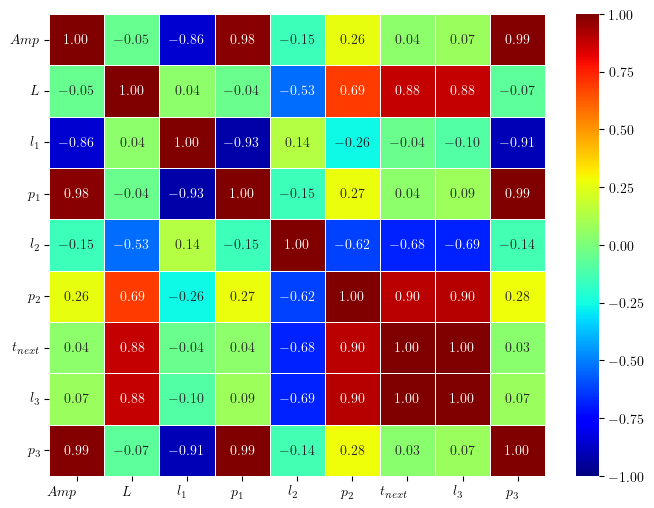

In [4]:
import numpy as np
# Enable LaTeX rendering in matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
latex_annotations = np.vectorize(lambda x: f'$ {x:.2f} $')(correlation_matrix.values)

# Create a heatmap
from matplotlib.ticker import FuncFormatter

#####
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='jet', fmt=".2f", linewidths=0.5,vmin=-1,vmax=1)


# Define your new labels (LaTeX formatted)
new_labels = [
    r'$Amp$',
    r'$L$',
    r'$l_1$',
    r'$p_1$',
    r'$l_2$',
    r'$p_2$',
    r'$t_{next}$',
    r'$l_3$',
    r'$p_3$', 
    # add more labels matching the order of your columns
]

# Apply the new labels to the x and y axes
ax.set_xticklabels(new_labels, rotation=0, ha='right')
ax.set_yticklabels(new_labels, rotation=0)

# Update each annotation to be in math mode by wrapping the text in dollar signs
for t in ax.texts:
    current_text = t.get_text()
    t.set_text(r"$" + current_text + r"$")

# Get the colorbar object
cbar = ax.collections[0].colorbar

# Retrieve the current tick values and update them to be in LaTeX math mode
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)  # Fix the tick positions
cbar.set_ticklabels([r"$" + f"{tick:.2f}" + r"$" for tick in ticks])

# # Set a custom formatter to wrap tick labels in LaTeX math mode
# cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r'${:.2f}$'.format(x)))
# cbar.update_ticks()  # Ensure the ticks are updated with the new formatter
plt.savefig("my_heatmap_new1.png", dpi=300, bbox_inches='tight')

plt.show()